**SCRIPT PYTHON ALIMENTATION BDD SQL**

In [2]:
pip install matplotlib pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 22.5 MB/s eta 0:00:00 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 8.1 MB/s eta 0:00:008.3 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

# Charger le fichier Excel
data = pd.read_excel("dataS204.xlsx")
print(data.columns)


Index(['Id', ' A (Likes) ', ' B (Partages) ', ' C (Commentaires) ',
       ' D (Nouveaux utilisateurs) ', ' E (Temps passé) ', ' F (Sexe) ',
       ' G (Âge) ', ' H (Localisation) ', ' I (Niveau d éducation) ',
       ' J (Type d abonnement) ', 'Likes en fonction des partages',
       ' K (Messages privés) ', ' L (Notifications) ', ' M (Publications) ',
       ' N (Réactions) ', ' O (Vues de vidéos) ', ' P (Clics publicités) ',
       ' Q (Suivis) ', ' R (Mentions J aime) ', ' S (Partages de liens) ',
       ' T (Téléchargements) ', ' U (Participations événements) ',
       ' V (Créations de groupes) ', ' W (Membres dans groupes) ',
       ' X (Publications dans groupes) ', ' Y (Réactions dans groupes) ',
       ' Z (Messages dans groupes) ', ' AA (Partages dans groupes) ',
       ' AB (Commentaires dans groupes) ',
       ' AC (Vues de vidéos dans groupes) ',
       ' AD (Clics publicités dans groupes) ', 'Vues de vidéos',
       ' AE (Suivis dans groupes) ', ' AF (Mentions J aime dan

In [21]:
import pandas as pd

def generate_sql_from_excel(excel_file, sql_file):
    # Charger les données depuis l'Excel
    data = pd.read_excel(excel_file)
    # Nettoyer les noms de colonnes pour éviter les espaces indésirables
    data.columns = data.columns.str.strip()

    with open(sql_file, "w", encoding="utf-8") as sql:
        for _, row in data.iterrows():
            # Préparer les données pour la table utilisateur
            genre = f"'{row['F (Sexe)']}'" if not pd.isnull(row['F (Sexe)']) else "NULL"
            username = f"'Utilisateur_{row['Id']}'"  # Exemple de nom utilisateur généré
            date_naissance = "NULL"  # A adapter si les dates sont présentes
            niveau_education = f"'{row['I (Niveau d éducation)']}'" if not pd.isnull(row['I (Niveau d éducation)']) else "NULL"
            type_abonnement = f"'{row['J (Type d abonnement)']}'" if not pd.isnull(row['J (Type d abonnement)']) else "NULL"

            sql.write(f"INSERT INTO utilisateur (genre, username, date_de_naissance, niveau_d_education, type_d_abonnement) "
                      f"VALUES ({genre}, {username}, {date_naissance}, {niveau_education}, {type_abonnement});\n")

            # Préparer les données pour la table Session
            localisation = f"'{row['H (Localisation)']}'" if not pd.isnull(row['H (Localisation)']) else "NULL"
            sql.write(f"INSERT INTO Session (datedebut, date_fin, localisation, Id_utilisateur) "
                      f"VALUES (NULL, NULL, {localisation}, {row['Id']});\n")

            # Préparer les données pour la table Notification
            sql.write(f"INSERT INTO Notification (Id_utilisateur, contenu) "
                      f"VALUES ({row['Id']}, 'Notification utilisateur {row['Id']}');\n")

            # Préparer les données pour la table Publication
            sql.write(f"INSERT INTO publication (Id_page, Id_utilisateur, contenu, date_publication) "
                      f"VALUES (1, {row['Id']}, 'Publication utilisateur {row['Id']}', NULL);\n")

            # Préparer les données pour la table Reaction
            sql.write(f"INSERT INTO reaction (Id_page, Id_utilisateur, Id_publication, Id_utilisateur_1, type, contenu) "
                      f"VALUES (1, {row['Id']}, 1, {row['Id']}, 'like', 'Réaction de l’utilisateur {row['Id']}');\n")

            # Préparer les données pour la table Rejoint
            sql.write(f"INSERT INTO rejoint (Id_utilisateur, Id_page, Id_groupe) "
                      f"VALUES ({row['Id']}, 1, 1);\n")

    print(f"Le fichier SQL '{sql_file}' a été généré avec succès.")

# Exemple d'utilisation
excel_file = "dataS204.xlsx"  # Chemin vers le fichier Excel
sql_file = "dataS204_output.sql"  # Fichier de sortie SQL

generate_sql_from_excel(excel_file, sql_file)


Le fichier SQL 'dataS204_output.sql' a été généré avec succès.


**VISUALISATIONS GRAPHIQUES**

In [1]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("dataS204.xlsx")
df

,A (Likes),B (Partages),C (Commentaires),D (Nouveaux utilisateurs),E (Temps passé),F (Sexe),G (Âge),H (Localisation),I (Niveau d'éducation),J (Type d'abonnement),...,AK (Membres sur pages),AL (Publications sur pages),AM (Réactions sur pages),AN (Messages sur pages),AO (Partages sur pages),AP (Commentaires sur pages),AQ (Vues de vidéos sur pages),Commentaires,Nouveaux utilisateurs,Engagement estimé
0,237,1046,60,127,31,Homme,43,Lyon,Bac+5,Gratuit,...,55,12,271,9,49,4,2682,313.502723,80.915460,549.465691
1,359,562,123,499,66,Homme,33,Paris,Doctorat,Gratuit,...,241,10,379,39,46,17,850,418.652492,220.034828,775.790893
2,391,310,171,365,40,Homme,18,Bordeaux,Doctorat,Premium,...,269,37,118,67,17,49,1019,409.700940,243.126830,807.065123
3,500,229,191,423,90,Homme,34,Paris,Bac+2,Entreprise,...,476,5,473,32,20,14,5698,403.807934,274.019625,921.371263
4,973,44,36,314,58,Homme,59,Toulouse,Doctorat,Gratuit,...,214,43,133,83,16,85,6917,316.370281,99.633705,1292.452693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,214,134,31,68,Femme,44,Bordeaux,Bac+2,Gratuit,...,336,29,73,80,35,52,9234,1208.318798,143.304809,10250.433290
9996,136,252,50,135,104,Homme,45,Bordeaux,Bac,Premium,...,230,18,58,67,10,28,1683,1311.922865,80.595887,10444.083353
9997,66,815,51,226,69,Femme,25,Toulouse,Bac,Premium,...,306,14,355,27,46,41,1864,1406.280895,97.929242,10463.925698
9998,674,1024,182,473,63,Homme,49,Bordeaux,Doctorat,Premium,...,451,39,316,8,41,81,1920,1405.031784,280.070282,11085.807709


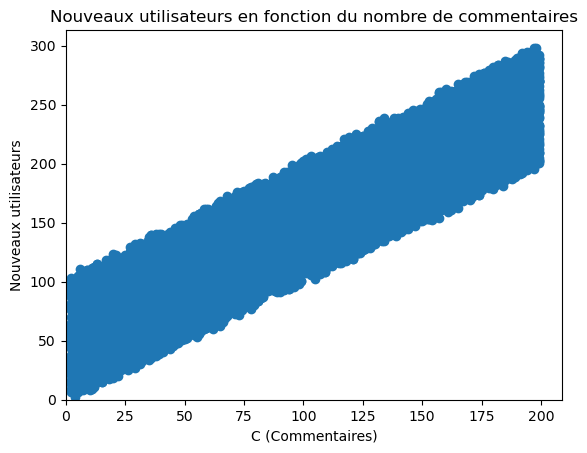

Coefficient de Pearson : 0.8970515873231285


In [3]:
#Affichage du graphique.

X=list(df[" C (Commentaires) "])
Y=list(df["Nouveaux utilisateurs "])
plt.scatter(X, Y)
plt.title('Nouveaux utilisateurs en fonction du nombre de commentaires')
plt.ylabel('Nouveaux utilisateurs')
plt.xlabel('C (Commentaires)')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

#Définition du coefficient de pearson pour vérifier la relation.

#moyenne des colonnes
moyenne_X = np.mean(X)
moyenne_Y = np.mean(Y)

#deux nouvelles colonnes Xi - X̄ et Yi - ȳ
X_diff_a_moyenne = []
Y_diff_a_moyenne = []
for i in range(len(X)):
    X_diff_a_moyenne.append(X[i] - moyenne_X)
    Y_diff_a_moyenne.append(Y[i] - moyenne_Y)

#nouvelle colonne (Xi - X̄)(Yi - ȳ)
produit_ecarts = []

for i in range(len(X)):
    produit_ecarts.append(X_diff_a_moyenne[i] * Y_diff_a_moyenne[i])

#numerateur pour le coefficient de pearson
numerateur = sum(produit_ecarts)

#deux nouvelles colonnes (Xi - X̄)² et (Yi - ȳ)²
x_diff_carre = []
y_diff_carre = []

for i in range(len(X)):
    x_diff_carre.append(X_diff_a_moyenne[i] ** 2)
    y_diff_carre.append(Y_diff_a_moyenne[i] ** 2)

#dénominateur pour le coefficient de pearson
denominateur = (sum(x_diff_carre) * sum(y_diff_carre)) ** 0.5

#coefficient de pearson
r = numerateur / denominateur
print("Coefficient de Pearson :", r)

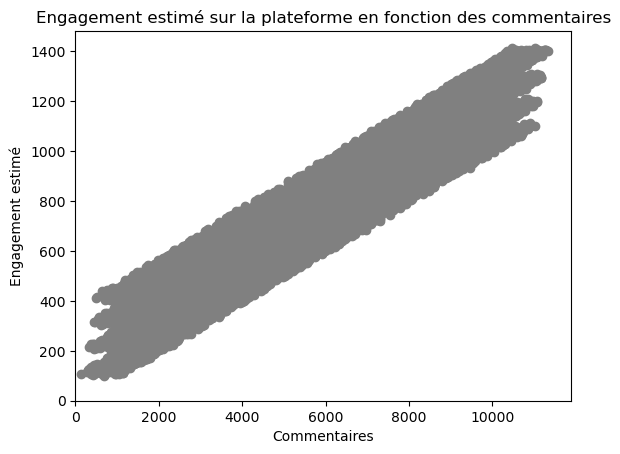

Coefficient de Pearson : 0.9426564331866031


In [4]:
#Affichage du graphique.

X=list(df["Engagement estimé"])
Y=list(df["Commentaires"])
plt.scatter(X, Y, color='grey')
plt.title('Engagement estimé sur la plateforme en fonction des commentaires')
plt.ylabel('Engagement estimé')
plt.xlabel('Commentaires')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

#Définition du coefficient de pearson pour vérifier la relation.

#moyenne des colonnes
moyenne_X = np.mean(X)
moyenne_Y = np.mean(Y)

#deux nouvelles colonnes Xi - X̄ et Yi - ȳ
X_diff_a_moyenne = []
Y_diff_a_moyenne = []
for i in range(len(X)):
    X_diff_a_moyenne.append(X[i] - moyenne_X)
    Y_diff_a_moyenne.append(Y[i] - moyenne_Y)

#nouvelle colonne (Xi - X̄)(Yi - ȳ)
produit_ecarts = []

for i in range(len(X)):
    produit_ecarts.append(X_diff_a_moyenne[i] * Y_diff_a_moyenne[i])

#numerateur pour le coefficient de pearson
numerateur = sum(produit_ecarts)

#deux nouvelles colonnes (Xi - X̄)² et (Yi - ȳ)²
x_diff_carre = []
y_diff_carre = []

for i in range(len(X)):
    x_diff_carre.append(X_diff_a_moyenne[i] ** 2)
    y_diff_carre.append(Y_diff_a_moyenne[i] ** 2)

#dénominateur pour le coefficient de pearson
denominateur = (sum(x_diff_carre) * sum(y_diff_carre)) ** 0.5

#coefficient de pearson
r = numerateur / denominateur
print("Coefficient de Pearson :", r)

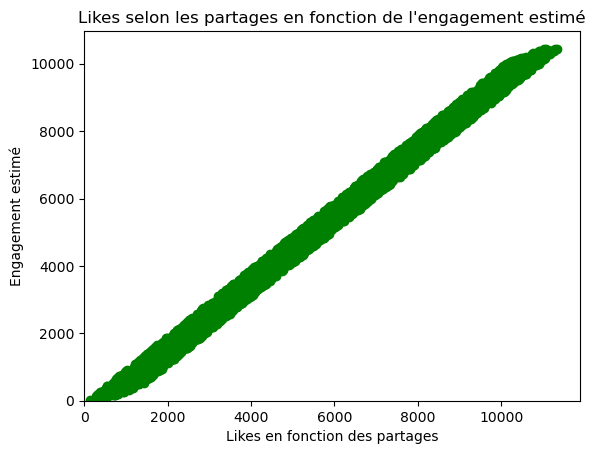

Coefficient de Pearson : 0.9980256843550009


In [5]:
#Affichage du graphique.

X=list(df["Engagement estimé"])
Y=list(df["Likes en fonction des partages"])
plt.scatter(X, Y, color='green')
plt.title('Likes selon les partages en fonction de l\'engagement estimé')
plt.xlabel('Likes en fonction des partages')
plt.ylabel('Engagement estimé')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

#Définition du coefficient de pearson pour vérifier la relation.

#moyenne des colonnes
moyenne_X = np.mean(X)
moyenne_Y = np.mean(Y)

#deux nouvelles colonnes Xi - X̄ et Yi - ȳ
X_diff_a_moyenne = []
Y_diff_a_moyenne = []
for i in range(len(X)):
    X_diff_a_moyenne.append(X[i] - moyenne_X)
    Y_diff_a_moyenne.append(Y[i] - moyenne_Y)

#nouvelle colonne (Xi - X̄)(Yi - ȳ)
produit_ecarts = []

for i in range(len(X)):
    produit_ecarts.append(X_diff_a_moyenne[i] * Y_diff_a_moyenne[i])

#numerateur pour le coefficient de pearson
numerateur = sum(produit_ecarts)

#deux nouvelles colonnes (Xi - X̄)² et (Yi - ȳ)²
x_diff_carre = []
y_diff_carre = []

for i in range(len(X)):
    x_diff_carre.append(X_diff_a_moyenne[i] ** 2)
    y_diff_carre.append(Y_diff_a_moyenne[i] ** 2)

#dénominateur pour le coefficient de pearson
denominateur = (sum(x_diff_carre) * sum(y_diff_carre)) ** 0.5

#coefficient de pearson
r = numerateur / denominateur
print("Coefficient de Pearson :", r)